# Linear Regression (One Variable)

## Linear Regression
<h3><b>Function</b></h3>
<p>Since this is linear regression with one variable we only have one feature</p>
<p>$f_{w,b}(x) = wx + b$</p>
<p>$w$ is called the weight and $b$ is call the bias</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are to predict the price of a house given its size in 1000 square feet and price in 1k dollars. Here is an example:

In [2]:
x_train = np.array([1.287, 1.100, 1.569, 2.023, .890])
y_train = np.array([823.990, 759.230, 798.200, 1200.000, 623.450])
m = len(x_train) # the number of training data
# We have a default value for w and b
w = 100 # initial value for w
b = 100 # initial value for b

Let's try to see the data using scatter plot. In the graph below the line shows our line with initial $w$ and $b$ values

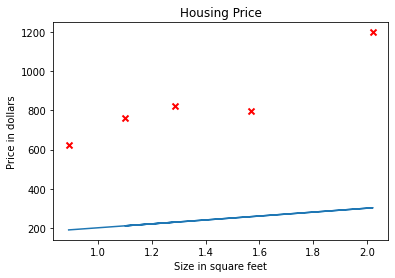

In [3]:
plt.figure()
plt.scatter(x_train, y_train, marker='x', color='r', linewidths=2)
ax = plt.gca()
ax.set_title('Housing Price');
ax.set_xlabel('Size in square feet');
ax.set_ylabel('Price in dollars');

plt.plot(x_train, w * x_train + b);

In [4]:
def predict(x, w, b):
    return w * x + b

If we try to predict the cost of a house with size = 1.287 we'll get:

In [5]:
print(f'The cost predicted for a house with size=1.287 is {predict(1.287, w, b)}k$')
print(f'The actual cost is {y_train[0]}k$')

The cost predicted for a house with size=1.287 is 228.7k$
The actual cost is 823.99k$


<h3><b>Cost Function</b></h3>
<p>Cost function returns the difference of the values. If the cost is near zero, prediction is more accurate.</p>
$J(w,b) = \frac{1}{2m}\Sigma_{i=1}^{m}(f_{w,b}(x^{(i)})-y^{(i)})^2$ <br>
here $m$ is the number of training data, in this case 5

In [6]:
def cost(x, y, w, b):
    result = 0
    for i in range(m):
        result = result + (w * x[i] + b - y[i])**2
    result = result / (2 * m)
    return result

In [7]:
print(f'The cost function return {cost(x_train, y_train, w, b)} when w={w} and b={b}')

The cost function return 194364.15595000001 when w=100 and b=100


<h3><b>Gradient Descent</b><br></h3>
This is an algorithm that finds the best $w$ and $b$ that minimizes the cost function<br>
Algorithm is<br>

Repeat until converges { <br>
    $w = w - \alpha\frac{d}{dw}J(w, b)$ <br>
    $b = b - \alpha\frac{d}{db}J(w, b)$ <br>
}<br>
Calculating the derivatives we will have: <br>
$w = w - \alpha\frac{1}{m}\Sigma_{i=1}^{m}(f_{w, b}(x^{i})-y^{(i)})x^{i}$<br>
$b = b - \alpha\frac{1}{m}\Sigma_{i=1}^{m}(f_{w, b}(x^{i})-y^{(i)})$ <br>
$\alpha$ is the learning rate

In [8]:
def gradient(x, y, w, b):
    sum_w = 0
    sum_b = 0
    m = len(x)
    for i in range(m):
        sum_w += (w * x[i] + b - y[i]) * x[i]
        sum_b += (w * x[i] + b - y[i])
    w = (1/m) * sum_w
    b = (1/m) * sum_b
    return w, b

In [9]:
def gradient_descent(x, y, init_w, init_b, alpha, cost_function, gradient_function, iterations=1000):
    w, b = init_w, init_b
    for i in range(1, iterations + 1):
        w_d, b_d = gradient_function(x, y, w, b)
        w = w - (alpha * w_d)
        b = b - (alpha * b_d)
        if i % 10 == 0 and i < 1000:
            print(f'cost for w={w:0.10} and b={b} is {cost(x, y, w, b)} on iteration {i}')
    return w, b

In [10]:
w, b = gradient_descent(x_train, y_train, w, b, 0.1, cost, gradient, 10000)

cost for w=389.3472991 and b=293.0474269406168 is 2800.0112947367707 on iteration 10
cost for w=400.4878388 and b=294.43351608920767 is 2616.20491452533 on iteration 20
cost for w=403.5192137 and b=290.54282835495997 is 2591.888350292275 on iteration 30
cost for w=406.1809032 and b=286.7003821414861 is 2570.091161011257 on iteration 40
cost for w=408.7014413 and b=283.04851158184164 is 2550.4485999235512 on iteration 50
cost for w=411.0939912 and b=279.58169763451764 is 2532.7475989487925 on iteration 60
cost for w=413.3652148 and b=276.2906751134325 is 2516.796245381158 on iteration 70
cost for w=415.5212692 and b=273.1665333976835 is 2502.42159611676 on iteration 80
cost for w=417.5679946 and b=270.2008104060444 is 2489.4678025344056 on iteration 90
cost for w=419.5109348 and b=267.3854730573718 is 2477.794420799111 on iteration 100
cost for w=421.3553526 and b=264.7128956086512 is 2467.2748891830197 on iteration 110
cost for w=423.1062437 and b=262.1758390023543 is 2457.795155894812

#### Result
Calling gradient descent resulted in a $w$ and $b$ that minimized the cost function. In this example the cost function is very far from zero but it predicts close to the actual value

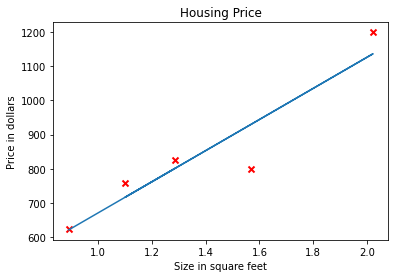

In [11]:
plt.figure()
plt.scatter(x_train, y_train, marker='x', color='r', linewidths=2)
ax = plt.gca()
ax.set_title('Housing Price');
ax.set_xlabel('Size in square feet');
ax.set_ylabel('Price in dollars');

plt.plot(x_train, w * x_train + b);

Now we can predict the cost of a house with size of 1.287 somewhat close to its value

In [12]:
print(f'The cost predicted for a house with size=1.287 is {predict(1.287, w, b)}k$')
print(f'The actual cost is {y_train[0]}k$')

The cost predicted for a house with size=1.287 is 801.4032426402493k$
The actual cost is 823.99k$


This was the implementation of Univariant Linear Regression.